In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
df = pd.read_csv('eCom_cust_segmentation.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [5]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,70864.000000,70864.000000,70864.000000,70864.00000
mean,560639.843136,11.511233,3.063033,15552.19790
std,13176.494003,41.017582,31.894970,1595.50593
min,536365.000000,1.000000,0.001000,12747.00000
25%,549128.000000,2.000000,1.250000,14194.00000
50%,562012.500000,4.000000,1.950000,15525.00000
75%,572283.000000,12.000000,3.750000,16931.00000
max,581586.000000,4300.000000,8142.750000,18287.00000


In [6]:
df['CustomerID'].nunique()

3701

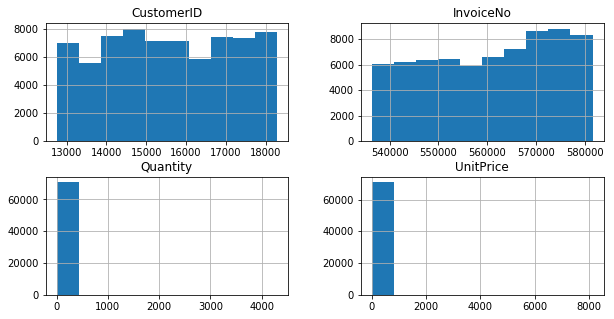

In [7]:
## Quantity and Unit price are highly skewed
df.hist(figsize=(10,5))
plt.show()

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
## Invoice date is a string. Also StockCode, description and Country
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null object
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ MB


<Figure size 1440x1440 with 0 Axes>

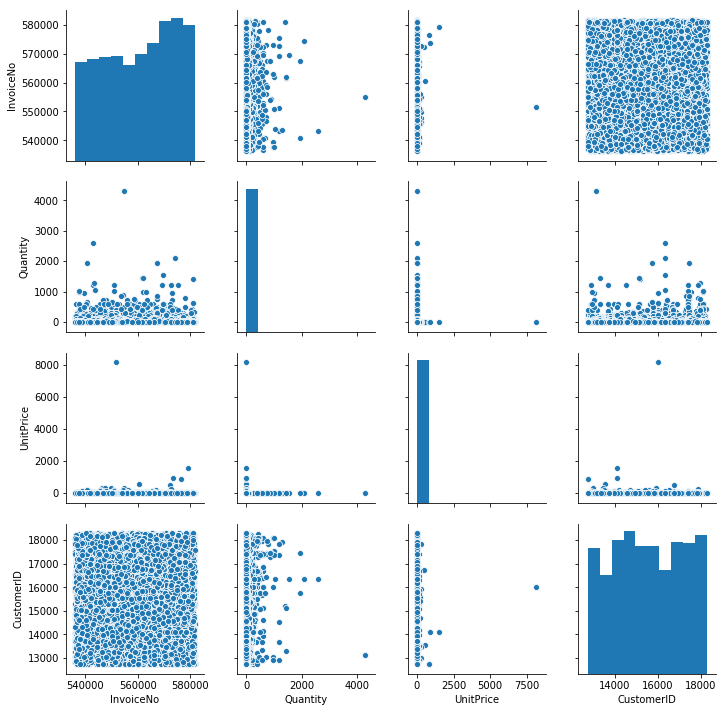

In [10]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

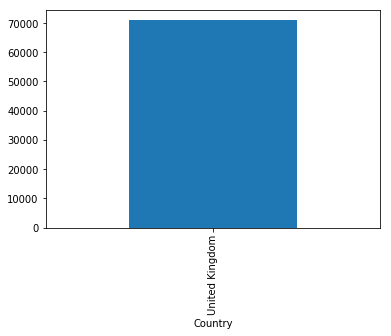

In [11]:
df.groupby('Country').CustomerID.count().plot.bar(ylim=0)
plt.show()

In [12]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

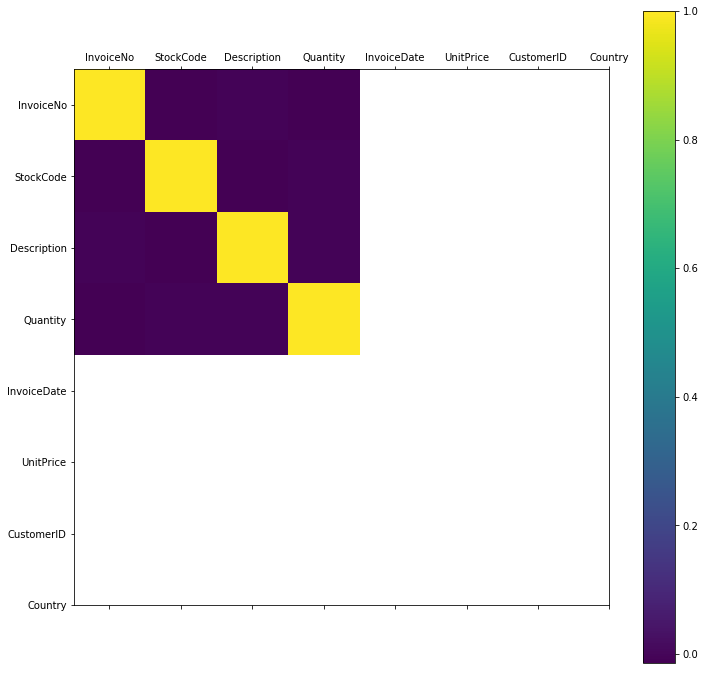

In [13]:
plot_corr_matrix(df)

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head()

416792   2011-10-25 08:26:00
482904   2011-11-20 11:56:00
263743   2011-07-14 13:35:00
495549   2011-11-23 15:53:00
204384   2011-05-25 13:36:00
Name: InvoiceDate, dtype: datetime64[ns]

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [16]:
## Find the last txion date for each customer
df['LastTxionDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')
df['FirstTxionDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df[df['CustomerID'] == 12747].sort_values('InvoiceDate')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,LastTxionDate,FirstTxionDate
9760,537215,21136,PAINTED METAL PEARS ASSORTED,8,2010-12-05 15:38:00,1.69,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
27395,538537,21754,HOME BUILDING BLOCK WORD,3,2010-12-13 10:41:00,5.95,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
64852,541677,82482,WOODEN PICTURE FRAME WHITE FINISH,12,2011-01-20 14:01:00,2.55,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
64851,541677,82494L,WOODEN FRAME ANTIQUE WHITE,12,2011-01-20 14:01:00,2.95,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
64853,541677,71459,HANGING JAM JAR T-LIGHT HOLDER,12,2011-01-20 14:01:00,0.85,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
106292,545321,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-03-01 14:53:00,1.69,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
106293,545321,21929,JUMBO BAG PINK VINTAGE PAISLEY,10,2011-03-01 14:53:00,1.95,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
175876,551992,21136,PAINTED METAL PEARS ASSORTED,8,2011-05-05 15:31:00,1.69,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
203749,554549,22606,WOODEN SKITTLES GARDEN SET,1,2011-05-25 09:57:00,15.95,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00


In [17]:
snapshot_dt = df['InvoiceDate'].max() + dt.timedelta(1)
snapshot_dt

Timestamp('2011-12-10 12:49:00')

In [18]:
df_group = df.groupby('CustomerID').agg(
    {
        'InvoiceDate':lambda x:(snapshot_dt - x.max()).days,
        'InvoiceNo':'count',
        'UnitPrice':'sum',
        #'InvoiceDate':lambda x:(snapshot_dt - x.min()).days,
    }
)
df_group.head()

,InvoiceDate,InvoiceNo,UnitPrice
CustomerID,,,
12747,2,27,126.26
12748,1,967,3098.10
12749,4,37,161.75
12820,3,17,33.57
12822,71,9,24.16


In [20]:
df_group.rename(columns=
                {
                    'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'UnitPrice':'Monetary'
                },inplace=True
               )
df_group.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,126.26
12748,1,967,3098.10
12749,4,37,161.75
12820,3,17,33.57
12822,71,9,24.16


In [21]:
import numpy as np
df_log = np.log(df_group)
df_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,0.693147,3.295837,4.838343
12748,0.000000,6.874198,8.038544
12749,1.386294,3.610918,5.086052
12820,1.098612,2.833213,3.513633
12822,4.262680,2.197225,3.184698


In [22]:
### Standardize the values using StandardScaler. Output will be in Numpy format
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_log)
rfm_std = scaler.transform(df_log)
rfm_std

array([[-2.19564198,  0.90952097,  1.20248146],
       [-2.68455336,  3.84505048,  3.50096957],
       [-1.7067306 ,  1.16799951,  1.38039385],
       ...,
       [-1.21781921, -1.22561047, -0.96212305],
       [-1.7067306 ,  2.3271315 ,  1.65938632],
       [-0.03159076,  0.4273268 , -0.24445969]])

In [23]:
df_rfm_std = pd.DataFrame(rfm_std, columns=df_log.columns, index=df_log.index)
#df_rfm_data_norm = pd.DataFrame(rfm_data_norm, index=rfm_data_log.index, columns=rfm_data_log.columns)
df_rfm_std.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,-2.195642,0.909521,1.202481
12748,-2.684553,3.845050,3.500970
12749,-1.706731,1.168000,1.380394
12820,-1.909647,0.530005,0.251031
12822,0.322128,0.008268,0.014780


In [24]:
#df_rfm_std.describe()
df_rfm_std.describe().round(5)

,Recency,Frequency,Monetary
count,3701.00000,3701.00000,3701.00000
mean,0.00000,0.00000,-0.00000
std,1.00014,1.00014,1.00014
min,-2.68455,-1.79424,-4.08663
25%,-0.60769,-0.65698,-0.62238
50%,0.10246,0.00827,0.10070
75%,0.85439,0.70335,0.66800
max,1.49412,4.22252,4.20089


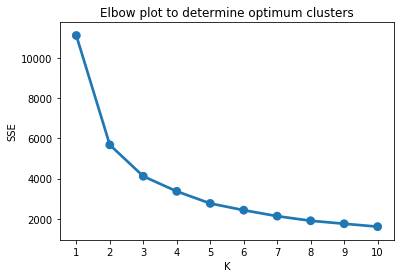

In [25]:
from sklearn.cluster import KMeans
sse={}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    ## Fit the data to this normalized data set
    kmeans.fit(df_rfm_std)
    ## Assign sum of squared errors to k element of dictionary
    sse[k]=kmeans.inertia_

##Plot the elbow plot
plt.title('Elbow plot to determine optimum clusters')
plt.xlabel('K')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

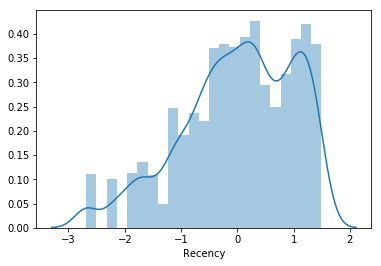

In [26]:
### Doing the log and std means data is normalized
sns.distplot(df_rfm_std['Recency'])
plt.show()

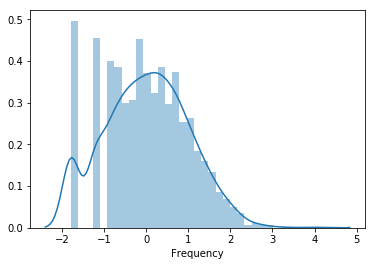

In [27]:
### Doing the log and std means data is normalized
sns.distplot(df_rfm_std['Frequency'])
plt.show()

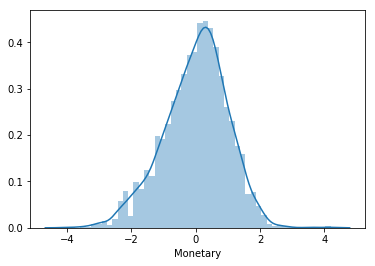

In [28]:
### Doing the log and std means data is normalized
sns.distplot(df_rfm_std['Monetary'])
plt.show()

In [29]:
### k = 4 is the optimum cluster size
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_rfm_std)
cluster_labels = kmeans.labels_

In [30]:
df_rfm_cluster = df_rfm_std.assign(Cluster=cluster_labels)

In [31]:
df_rfm_cluster.head(10)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.202481,1
12748,-2.684553,3.845050,3.500970,1
12749,-1.706731,1.168000,1.380394,1
12820,-1.909647,0.530005,0.251031,3
12822,0.322128,0.008268,0.014780,0
12823,1.331521,-1.794238,-0.811182,2
12824,0.203393,-0.324358,-0.187102,0
12826,-1.909647,0.530005,0.130406,3
12827,-0.218292,-1.225610,-0.626001,2


In [32]:
df_rfm_cluster_grp = df_rfm_cluster.groupby(['Cluster']).agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':['sum','count']
    }
)
df_rfm_cluster_grp.head()

Recency Frequency     Monetary      
             mean      mean          sum count
Cluster                                       
0        0.660645  0.097336   240.853082  1157
1       -0.980052  1.303586   976.761404   819
2        0.686994 -1.210029 -1184.762623   962
3       -0.815980 -0.021240   -32.851863   763

In [33]:
df_group['Cluster'] = df_rfm_cluster['Cluster']
df_group.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12747,2,27,126.26,1
12748,1,967,3098.10,1
12749,4,37,161.75,1
12820,3,17,33.57,3
12822,71,9,24.16,0


In [37]:
df_group = df_group.reset_index()
df_group[df_group['CustomerID']==12747]

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12747,2,27,126.26,1


In [38]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 5 columns):
CustomerID    3701 non-null int64
Recency       3701 non-null int64
Frequency     3701 non-null int64
Monetary      3701 non-null float64
Cluster       3701 non-null int32
dtypes: float64(1), int32(1), int64(3)
memory usage: 130.2 KB


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(df_group.values)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
df[df['CustomerID'] == 12747].sort_values('InvoiceDate')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,LastTxionDate,FirstTxionDate
9760,537215,21136,PAINTED METAL PEARS ASSORTED,8,2010-12-05 15:38:00,1.69,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
27395,538537,21754,HOME BUILDING BLOCK WORD,3,2010-12-13 10:41:00,5.95,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
64852,541677,82482,WOODEN PICTURE FRAME WHITE FINISH,12,2011-01-20 14:01:00,2.55,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
64851,541677,82494L,WOODEN FRAME ANTIQUE WHITE,12,2011-01-20 14:01:00,2.95,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
64853,541677,71459,HANGING JAM JAR T-LIGHT HOLDER,12,2011-01-20 14:01:00,0.85,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
106292,545321,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-03-01 14:53:00,1.69,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
106293,545321,21929,JUMBO BAG PINK VINTAGE PAISLEY,10,2011-03-01 14:53:00,1.95,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
175876,551992,21136,PAINTED METAL PEARS ASSORTED,8,2011-05-05 15:31:00,1.69,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00
203749,554549,22606,WOODEN SKITTLES GARDEN SET,1,2011-05-25 09:57:00,15.95,12747,United Kingdom,2011-12-07 14:34:00,2010-12-05 15:38:00


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 10 columns):
InvoiceNo         70864 non-null int64
StockCode         70864 non-null object
Description       70864 non-null object
Quantity          70864 non-null int64
InvoiceDate       70864 non-null datetime64[ns]
UnitPrice         70864 non-null float64
CustomerID        70864 non-null int64
Country           70864 non-null object
LastTxionDate     70864 non-null datetime64[ns]
FirstTxionDate    70864 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 8.4+ MB


In [42]:
df_group1 = df.groupby('CustomerID').agg(
    {
        'LastTxionDate':'max',
        'FirstTxionDate':'min',
        'Country':'unique'
    }
)
df_group1 = df_group1.reset_index()
df_group1.head()

,CustomerID,LastTxionDate,FirstTxionDate,Country
0,12747,2011-12-07 14:34:00,2010-12-05 15:38:00,[United Kingdom]
1,12748,2011-12-09 12:20:00,2010-12-05 12:42:00,[United Kingdom]
2,12749,2011-12-06 09:56:00,2011-05-10 15:25:00,[United Kingdom]
3,12820,2011-12-06 15:12:00,2011-01-17 12:34:00,[United Kingdom]
4,12822,2011-09-30 10:04:00,2011-09-13 13:46:00,[United Kingdom]


In [43]:
df_group1[df_group1['CustomerID']==12747]

,CustomerID,LastTxionDate,FirstTxionDate,Country
0,12747,2011-12-07 14:34:00,2010-12-05 15:38:00,[United Kingdom]


In [75]:
df_group2 = pd.merge(df_group, df_group1, on='CustomerID', how='inner')
df_group2[df_group2['CustomerID']==12747]

,CustomerID,Recency,Frequency,Monetary,Cluster,LastTxionDate,FirstTxionDate,Country
0,12747,2,27,126.26,1,2011-12-07 14:34:00,2010-12-05 15:38:00,[United Kingdom]


In [76]:
df_group2.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,LastTxionDate,FirstTxionDate,Country
0,12747,2,27,126.26,1,2011-12-07 14:34:00,2010-12-05 15:38:00,[United Kingdom]
1,12748,1,967,3098.10,1,2011-12-09 12:20:00,2010-12-05 12:42:00,[United Kingdom]
2,12749,4,37,161.75,1,2011-12-06 09:56:00,2011-05-10 15:25:00,[United Kingdom]
3,12820,3,17,33.57,3,2011-12-06 15:12:00,2011-01-17 12:34:00,[United Kingdom]
4,12822,71,9,24.16,0,2011-09-30 10:04:00,2011-09-13 13:46:00,[United Kingdom]


In [77]:
## Cluster 0 - Not recent, Not frequent, Largest no of transactions, High cost purchases ($38/transaction)-Gold customers
## Cluster 1 - Most Recent, Most Frequent, Large no of transactions and spent the most ($177/transaction)-Platinum customers
## Cluster 2 - Least recent, lease frequent, Fewer no of transactions and least spent ($6/transaction) - Churned customers
## Cluster 3 - Recent, Not that frequent, Fewer no of transactions, Medium cost purchases ($27/transaction) - regular customers

In [78]:
df_group2.groupby(['Cluster']).agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':['count','sum']
    }
)

Recency  Frequency Monetary            
               mean       mean    count         sum
Cluster                                            
0        141.664650  12.013829     1157   44889.130
1         19.318681  57.310134      819  145573.930
2        161.126819   2.382536      962    5801.840
3         18.698558  10.137615      763   20793.871

In [79]:
df_group2.describe()

,CustomerID,Recency,Frequency,Monetary,Cluster
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000
mean,15559.338557,94.298568,19.147257,58.648682,1.359633
std,1564.127769,99.974969,44.831615,210.647682,1.126143
min,12747.000000,1.000000,1.000000,0.080000,0.000000
25%,14215.000000,19.000000,4.000000,9.950000,0.000000
50%,15571.000000,52.000000,9.000000,27.230000,1.000000
75%,16895.000000,151.000000,21.000000,59.990000,2.000000
max,18287.000000,374.000000,1532.000000,8209.550000,3.000000


In [ ]:
df_group2.to_csv("ecom_clustering_export.csv", encoding='utf-8', sep=',', index=False)

In [83]:
## Cluster 0 - Not recent, Not frequent, Largest no of transactions, High cost purchases ($38/transaction)-Gold customers
## Cluster 1 - Most Recent, Most Frequent, Large no of transactions and spent the most ($177/transaction)-Platinum customers
## Cluster 2 - Least recent, lease frequent, Fewer no of transactions and least spent ($6/transaction) - Churned customers
## Cluster 3 - Recent, Not that frequent, Fewer no of transactions, Medium cost purchases ($27/transaction) - regular customers
def customer_segment(df):
    if df['Cluster'] == 0:
        return 'Gold'
    elif df['Cluster'] == 1:
        return 'Platinum'
    elif df['Cluster'] == 2:
        return 'Churned'
    else:
        return 'Regular'

In [84]:
df_group2['CustomerSegment'] = df_group2.apply(customer_segment, axis=1)
df_group2.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,LastTxionDate,FirstTxionDate,Country,CustomerSegment
0,12747,2,27,126.26,1,2011-12-07 14:34:00,2010-12-05 15:38:00,[United Kingdom],Platinum
1,12748,1,967,3098.10,1,2011-12-09 12:20:00,2010-12-05 12:42:00,[United Kingdom],Platinum
2,12749,4,37,161.75,1,2011-12-06 09:56:00,2011-05-10 15:25:00,[United Kingdom],Platinum
3,12820,3,17,33.57,3,2011-12-06 15:12:00,2011-01-17 12:34:00,[United Kingdom],Regular
4,12822,71,9,24.16,0,2011-09-30 10:04:00,2011-09-13 13:46:00,[United Kingdom],Gold


In [57]:
## Cluster 0 - Not recent, Not frequent, Largest no of transactions, High cost purchases ($38/transaction)-Gold customers
df_group2[df_group2['CustomerSegment']=='Gold']

,CustomerID,Recency,Frequency,Monetary,Cluster,LastTxionDate,FirstTxionDate,Country,recency_group,CustomerSegment
4,12822,71,9,24.16,0,2011-09-30 10:04:00,2011-09-13 13:46:00,[United Kingdom],C,Gold
6,12824,60,6,18.24,0,2011-10-11 12:49:00,2011-10-11 12:49:00,[United Kingdom],B,Gold
10,12829,337,2,47.90,0,2011-01-07 11:13:00,2010-12-14 14:54:00,[United Kingdom],E,Gold
11,12830,91,10,18.79,0,2011-09-09 15:02:00,2011-06-21 10:53:00,[United Kingdom],D,Gold
13,12833,145,5,39.15,0,2011-07-17 13:46:00,2011-07-17 13:46:00,[United Kingdom],D,Gold
14,12834,283,9,49.45,0,2011-03-02 09:49:00,2011-03-02 09:49:00,[United Kingdom],E,Gold
19,12840,144,19,31.72,0,2011-07-19 09:29:00,2011-04-27 12:21:00,[United Kingdom],D,Gold
21,12842,70,8,97.46,0,2011-09-30 15:33:00,2011-02-04 12:36:00,[United Kingdom],C,Gold
22,12843,160,22,80.70,0,2011-07-03 12:21:00,2011-03-20 14:38:00,[United Kingdom],D,Gold
24,12845,269,4,13.75,0,2011-03-16 11:02:00,2011-02-22 14:10:00,[United Kingdom],E,Gold


In [58]:
## Cluster 1 - Most Recent, Most Frequent, Large no of transactions and spent the most ($177/transaction)-Platinum customers
df_group2[df_group2['CustomerSegment']=='Platinum']

,CustomerID,Recency,Frequency,Monetary,Cluster,LastTxionDate,FirstTxionDate,Country,recency_group,CustomerSegment
0,12747,2,27,126.26,1,2011-12-07 14:34:00,2010-12-05 15:38:00,[United Kingdom],A,Platinum
1,12748,1,967,3098.10,1,2011-12-09 12:20:00,2010-12-05 12:42:00,[United Kingdom],A,Platinum
2,12749,4,37,161.75,1,2011-12-06 09:56:00,2011-05-10 15:25:00,[United Kingdom],A,Platinum
15,12836,59,34,155.67,1,2011-10-11 15:10:00,2011-02-01 11:19:00,[United Kingdom],B,Platinum
18,12839,3,59,85.15,1,2011-12-07 12:33:00,2010-12-07 15:48:00,[United Kingdom],A,Platinum
20,12841,5,78,177.46,1,2011-12-05 11:13:00,2010-12-03 10:43:00,[United Kingdom],A,Platinum
31,12856,8,64,145.70,1,2011-12-02 10:52:00,2011-10-07 12:38:00,[United Kingdom],A,Platinum
35,12867,26,105,143.63,1,2011-11-13 15:30:00,2010-12-14 16:39:00,[United Kingdom],A,Platinum
40,12877,4,33,45.86,1,2011-12-06 10:30:00,2010-12-16 12:23:00,[United Kingdom],A,Platinum
50,12901,10,28,35.24,1,2011-11-29 14:08:00,2011-03-24 11:07:00,[United Kingdom],A,Platinum


In [87]:
df_group2.groupby('CustomerSegment')['CustomerID'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
CustomerSegment,,,,,,,,
Churned,962.0,15559.0,1550.0,12823.0,14198.0,15590.0,16852.0,18281.0
Gold,1157.0,15512.0,1576.0,12822.0,14130.0,15492.0,16801.0,18287.0
Platinum,819.0,15584.0,1547.0,12747.0,14298.0,15594.0,16902.0,18283.0
Regular,763.0,15605.0,1583.0,12820.0,14292.0,15618.0,17053.0,18282.0


In [91]:
df_group2.groupby('CustomerSegment')['CustomerID'].mean().round(0).sort_values()

CustomerSegment
Gold        15512.0
Churned     15559.0
Platinum    15584.0
Regular     15605.0
Name: CustomerID, dtype: float64